# Notebook de análise exploratória dos dados (EDA)

## Importação das bibliotecas

In [1]:
import pandas as pd
from scipy import stats
from statsmodels.tsa.stattools import adfuller

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.dates as mdates
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots


In [2]:
# Configurar paleta de cores e estilo

# Matplotlib
mpl.rcParams["figure.figsize"] = (20, 7)
mpl.rcParams["axes.facecolor"] = "white"
mpl.rcParams["font.size"] = 12
mpl.rcParams["figure.titlesize"] = 25
mpl.rcParams["figure.dpi"] = 100

# Seaborn
sns.set_style('whitegrid', {"grid.color": ".8", "grid.linestyle": "--"})
sns.set_palette(palette='mako')

## Aquisição dos dados

In [3]:
input_path = '../data/processed/dados_historicos_ibovespa_2015-2025_processed.csv'

df = pd.read_csv(input_path, index_col='ds', parse_dates=['ds'])
df.tail()

,target,close,open,high,low,volume,daily_return,return_lag_1,return_lag_2,return_lag_3,...,rsi_14,atr_14,obv,day_of_week,day_of_month,month,eua_return_lag1,china_return_lag1,europe_return_lag1,oil_return_lag1
ds,,,,,,,,,,,,,,,,,,,,,
2025-06-12,0,137800,137127,137931,136175,7.120000e+09,0.0049,0.0051,0.0054,-0.0030,...,56.429439,1746.368879,1.365131e+11,3,12,6,-0.002744,0.005170,-0.002228,0.043368
2025-06-13,1,137213,137800,137800,136586,8.630000e+09,-0.0043,0.0049,0.0051,0.0054,...,53.149650,1708.342531,1.278831e+11,4,13,6,0.003822,0.000101,-0.002472,-0.005876
2025-06-16,0,139256,137212,139988,137212,7.620000e+09,0.0149,-0.0043,0.0049,0.0051,...,61.530240,1784.603778,1.355031e+11,0,16,6,-0.011296,-0.007542,-0.008685,0.070213
2025-06-17,0,138840,139256,139497,138293,8.380000e+09,-0.0030,0.0149,-0.0043,0.0049,...,59.207770,1743.132080,1.271231e+11,1,17,6,0.009393,0.003474,0.006268,-0.013472
2025-06-18,0,138717,138844,139161,138443,8.320000e+09,-0.0009,-0.0030,0.0149,-0.0043,...,58.504620,1669.908360,1.188031e+11,2,18,6,-0.008352,-0.000391,-0.007578,0.043971


In [4]:
# informações gerais do dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2482 entries, 2015-06-17 to 2025-06-18
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   target              2482 non-null   int64  
 1   close               2482 non-null   int64  
 2   open                2482 non-null   int64  
 3   high                2482 non-null   int64  
 4   low                 2482 non-null   int64  
 5   volume              2482 non-null   float64
 6   daily_return        2482 non-null   float64
 7   return_lag_1        2482 non-null   float64
 8   return_lag_2        2482 non-null   float64
 9   return_lag_3        2482 non-null   float64
 10  return_lag_4        2482 non-null   float64
 11  return_lag_5        2482 non-null   float64
 12  momentum_5          2482 non-null   float64
 13  momentum_21         2482 non-null   float64
 14  momentum_63         2482 non-null   float64
 15  sma_21              2482 non-null   f

## Análise exploratória

In [5]:
# resumo estatístico básico
df.describe()

,target,close,open,high,low,volume,daily_return,return_lag_1,return_lag_2,return_lag_3,...,rsi_14,atr_14,obv,day_of_week,day_of_month,month,eua_return_lag1,china_return_lag1,europe_return_lag1,oil_return_lag1
count,2482.000000,2482.000000,2482.000000,2482.000000,2482.000000,2.482000e+03,2482.000000,2482.000000,2482.000000,2482.000000,...,2482.000000,2482.000000,2.482000e+03,2482.000000,2482.000000,2482.000000,2482.000000,2482.000000,2482.000000,2482.000000
mean,0.522965,95761.666801,95728.100725,96579.991942,94908.077760,4.883084e+08,0.000496,0.000501,0.000500,0.000492,...,52.841734,1669.564195,3.614412e+09,1.999194,15.776793,6.497180,0.000536,-0.000073,0.000273,0.000439
std,0.499573,26696.892083,26696.097392,26794.265729,26591.710939,2.275271e+09,0.014992,0.014993,0.014993,0.014991,...,12.039613,664.653090,1.905250e+10,1.409074,8.743843,3.412078,0.011495,0.012177,0.011033,0.024523
min,0.000000,37497.000000,37501.000000,38031.000000,37046.000000,4.243200e+05,-0.147800,-0.147800,-0.147800,-0.147800,...,19.502335,682.015554,-8.576941e+09,0.000000,1.000000,1.000000,-0.119841,-0.084909,-0.119722,-0.244036
25%,0.000000,74319.000000,74313.000000,75035.000000,73268.000000,3.930000e+06,-0.007200,-0.007200,-0.007200,-0.007200,...,44.093116,1293.277918,2.160372e+08,1.000000,8.000000,4.000000,-0.003406,-0.004736,-0.004358,-0.010424
50%,1.000000,102466.500000,102403.500000,103607.500000,101547.000000,7.620000e+06,0.000700,0.000700,0.000700,0.000700,...,52.472945,1576.162737,3.951091e+08,2.000000,16.000000,7.000000,0.000417,0.000000,0.000538,0.000658
75%,1.000000,117414.500000,117370.000000,118287.500000,116263.750000,1.120000e+07,0.008400,0.008400,0.008400,0.008400,...,61.554550,1907.267469,6.956166e+08,3.000000,23.000000,9.000000,0.005708,0.005035,0.005749,0.012547
max,1.000000,140110.000000,140109.000000,140382.000000,138966.000000,2.487000e+10,0.139100,0.139100,0.139100,0.139100,...,84.282462,6755.132249,1.820931e+11,4.000000,31.000000,12.000000,0.095154,0.080637,0.081760,0.210186


### Análise univariada

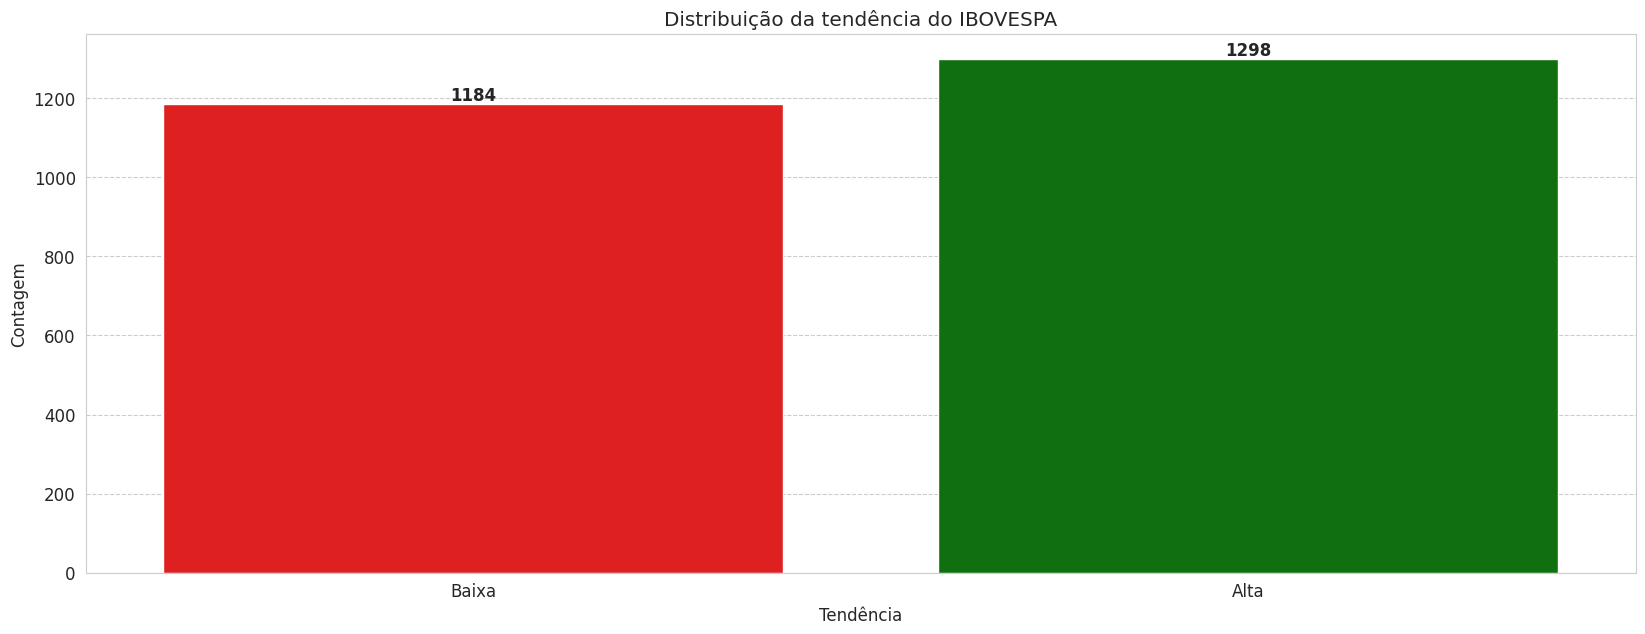

In [6]:
# Paleta
palette_green_red = {0: 'red', 1: 'green'}

# Gráfico de qtd de dias com tendência alta ou baixa
ax = sns.countplot(data=df, x='target', hue='target', palette=palette_green_red, legend=False)

# Título e rótulos dos eixos
plt.title('Distribuição da tendência do IBOVESPA')
plt.xlabel('Tendência')
plt.ylabel('Contagem')
plt.xticks(ticks=[0, 1], labels=['Baixa', 'Alta'])

# Adiciona os valores nas barras
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}',
                  (p.get_x() + p.get_width() / 2, height),
                  ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.show()

In [7]:
# Porcentagem da distribuição da tendência
df['target'].value_counts(normalize=True)

target
1    0.522965
0    0.477035
Name: proportion, dtype: float64

Após a análise da distribuição da variável alvo, verificamos que o dataset é naturalmente balanceado. Portanto, a aplicação de técnicas de reamostragem como *oversampling* ou *undersampling* não se faz necessária.

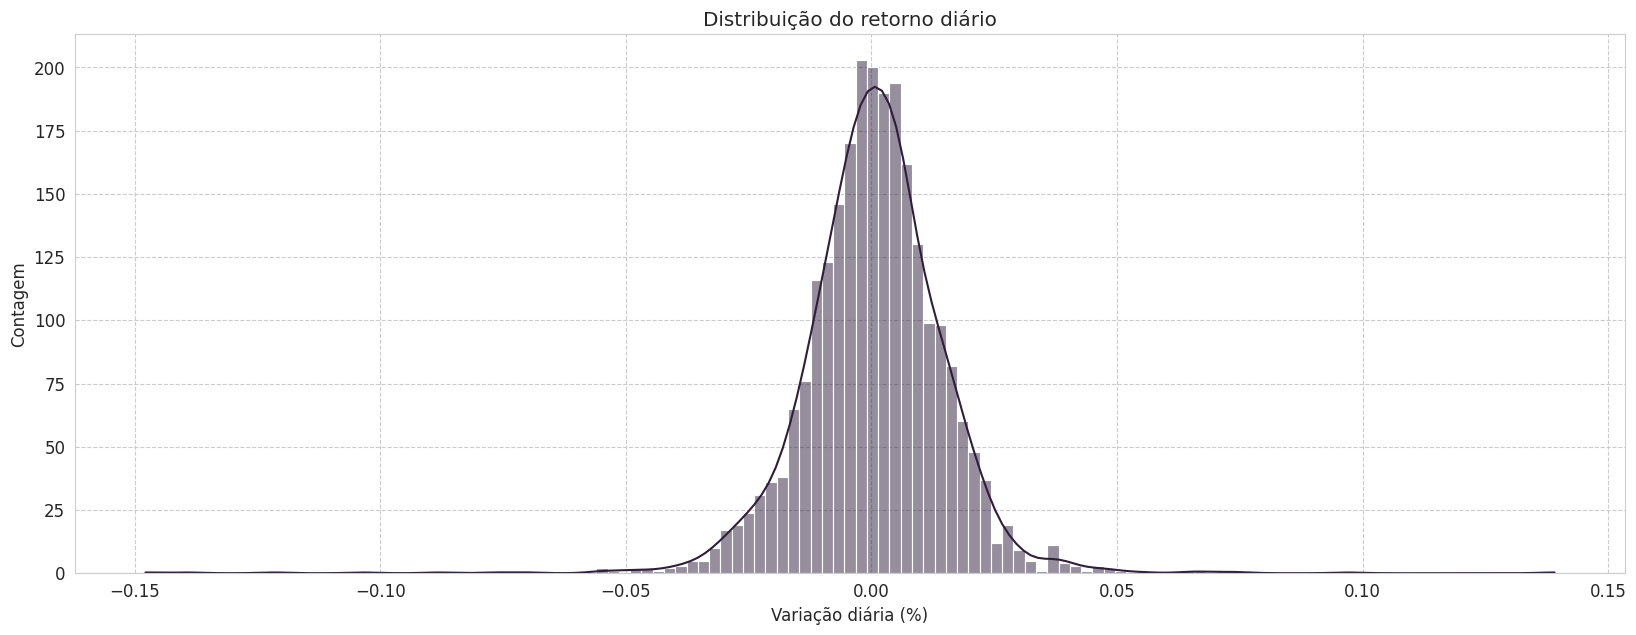

In [8]:
# Distribuição do retorno diário
sns.histplot(df['daily_return'], kde=True)

# Título e rótulos dos eixos
plt.title('Distribuição do retorno diário')
plt.xlabel('Variação diária (%)')
plt.ylabel('Contagem')

plt.show()

Para conferir estatisticamente qual o comportamento dessa distribuição, vamos usar um teste de Shapiro-Wilk (vide tópico "Testes de hipótese" nesse notebook)

### Análise de série temporal

In [9]:
# Gráfico de candlestick com abertura, fechamento, máxima e mínima
fig = go.Figure(data=[go.Candlestick(
    x=df.index,
    open=df['open'],
    high=df['high'],
    low=df['low'],
    close=df['close'],
    name='OHLC',
    hovertext=[
        f"<b>Data</b>: {d.strftime('%d/%m/%Y')}<br>"
        f"<b>Abertura</b>: {o:.0f}<br>"
        f"<b>Máxima</b>: {h:.0f}<br>"
        f"<b>Mínima</b>: {l:.0f}<br>"
        f"<b>Fechamento</b>: {c:.0f}"
        for d, o, h, l, c in zip(df.index, df['open'], df['high'], df['low'], df['close'])
    ],
    hoverinfo='text'
)])

# Gráfico para a média móvel simples
fig.add_trace(go.Scatter(
    x=df.index,
    y=df['sma_21'],
    marker_color='blue',
    opacity=0.5,
    name='MMS (21d)'
))

# Título e rótulos dos eixos
fig.update_layout(
    title=dict(text='Análise histórica do índice IBOVESPA' + '<br><sup>dos últimos 10 anos</sup>', x=0.5, font_size=20),
    xaxis=dict(title='Data'),                                                  
    yaxis=dict(title='Preço OHLC (R$)'),
    template='plotly_white',
    height=700
)

# Atualizar eixo X de 1 em 1 ano
fig.update_xaxes(
    dtick="M12",
    tickformat="%Y",
    rangeslider_visible=False
)

fig.show()

In [10]:
# Criar subplot na figura
fig = make_subplots(rows=2, cols=1, shared_xaxes=True, vertical_spacing=0.1)

# Gráfico de preço de fechamento
fig.add_trace(go.Scatter(
    x=df.index,
    y=df['close'],
    mode='lines',
    name='Preço de fechamento',
    line=dict(color='blue'),
    showlegend=False
), row=1, col=1)

# Gráfico de IFR
fig.add_trace(go.Scatter(
    x=df.index,
    y=df['rsi_14'],
    mode='lines',
    name='IFR',
    line=dict(color='orange'),
    showlegend=False
), row=2, col=1)

# Linhas horizontais para o IFR
fig.add_hline(y=70, line_dash='dash', line_color='red', annotation_text='Sobrecompra (70)', row=2, col=1)
fig.add_hline(y=30, line_dash='dash', line_color='green', annotation_text='Sobrevenda (30)', row=2, col=1)

# Título e rótulo dos eixos
fig.update_layout(
    title=dict(text='Preço de fechamento e IFR do IBOVESPA', x=0.5, font_size=20),
    xaxis2=dict(title='Data'),
    yaxis=dict(title='Preço de fechamento (R$)'),
    yaxis2=dict(range=[0,100], autorange=False, title='Índice de força relativa'),
    template='plotly_white',
    height=700
)

# Atualizar eixo X de 1 em 1 ano
fig.update_xaxes(
    dtick='M12',
    tickformat='%Y'
)

fig.show()

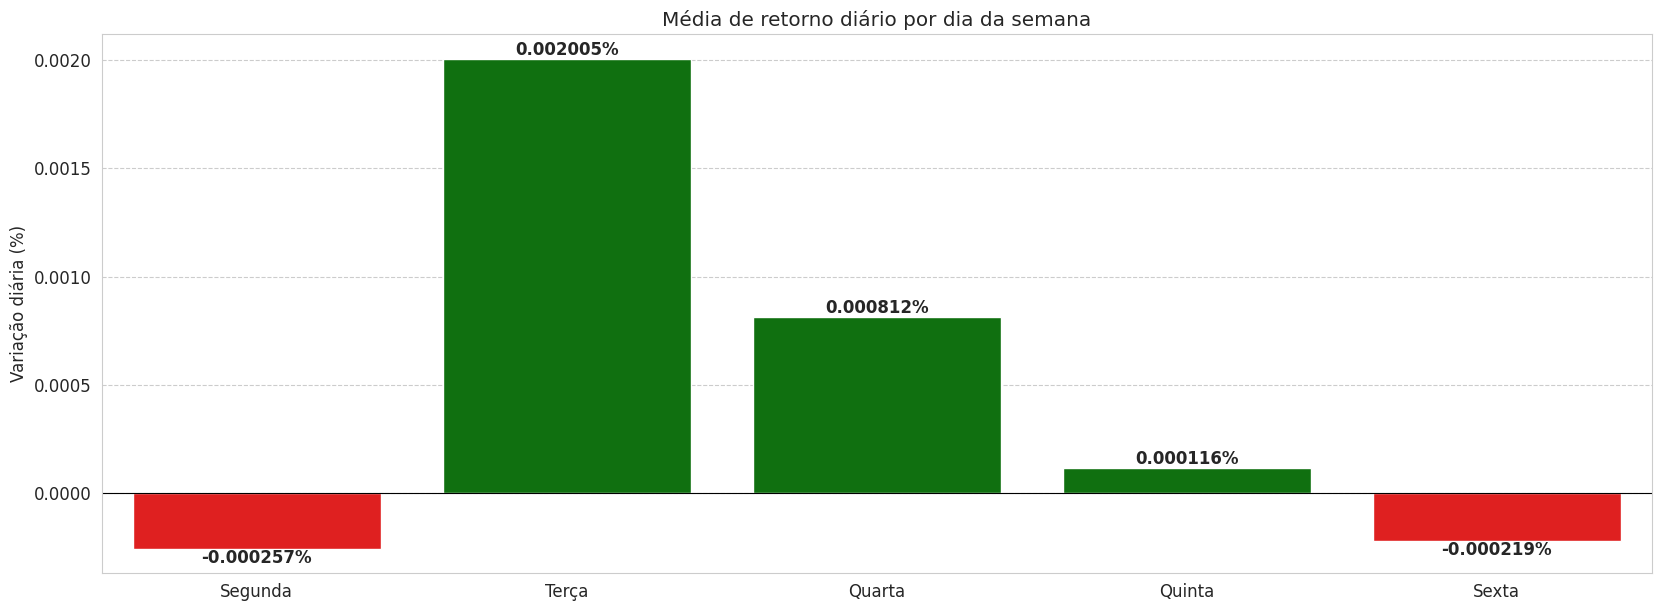

In [11]:
df_week = df.groupby('day_of_week')['daily_return'].mean().reset_index()

# Gráfico de barra de agrupamento por dia da semana
cores = ['green' if x > 0 else 'red' for x in df_week['daily_return']]
ax = sns.barplot(df_week, x='day_of_week', y='daily_return', hue='day_of_week', palette=cores, legend=False)
plt.axhline(0, color='black', linewidth=0.8)

# Título e rótulo dos eixos
plt.title('Média de retorno diário por dia da semana')
plt.ylabel('Variação diária (%)')
plt.xlabel('')
plt.xticks(ticks=[0, 1, 2, 3, 4], labels=['Segunda', 'Terça', 'Quarta', 'Quinta', 'Sexta'])

# Adiciona os valores nas barras
for p in ax.patches:
    height = p.get_height()
    ax.text(
        x=p.get_x() + p.get_width() / 2,
        y=height,
        s=f'{height:.6f}%',
        ha='center',
        va='bottom' if height > 0 else 'top',
        fontsize=12,
        fontweight='bold'
    )

plt.show()


A semana tende a começar (segunda) e terminar (sexta) com pequenas perdas médias. 

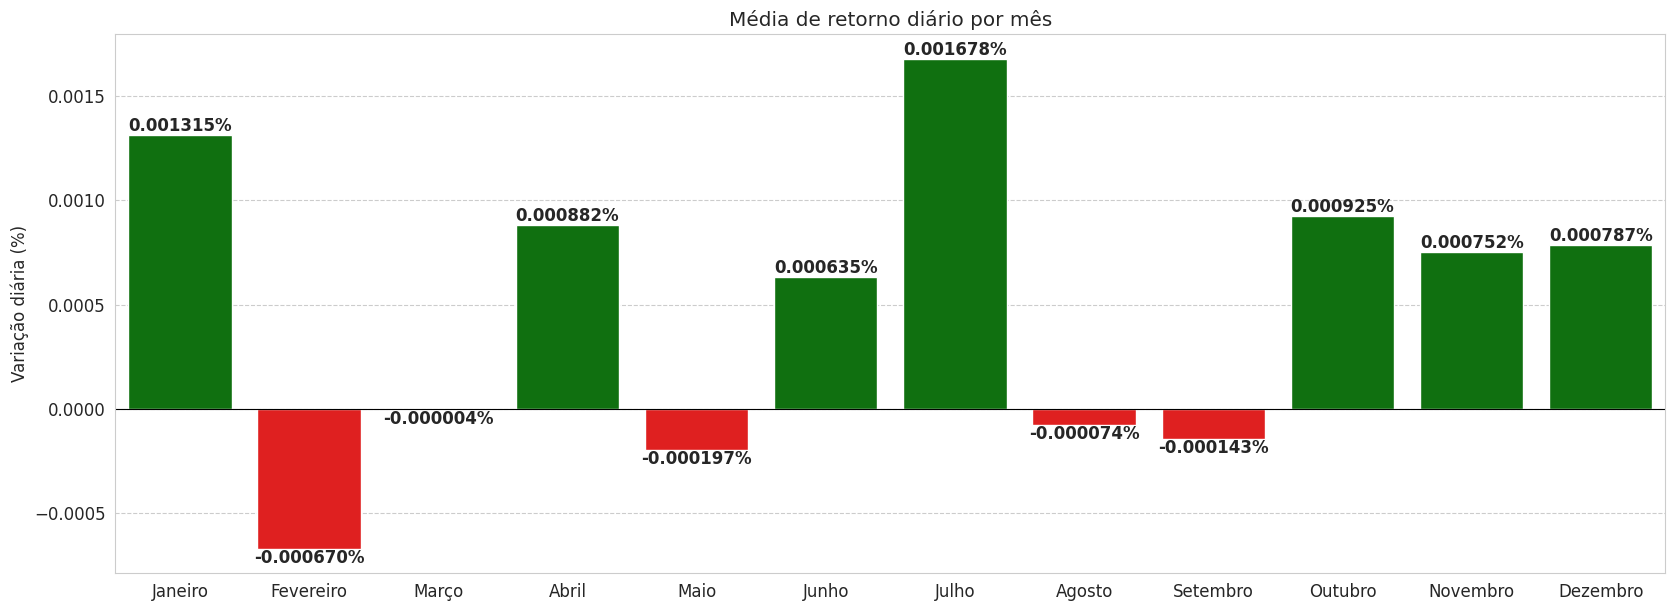

In [12]:
df_month = df.groupby('month')['daily_return'].mean().reset_index()

# Gráfico de barra de agrupamento por dia da semana
cores = ['green' if x > 0 else 'red' for x in df_month['daily_return']]
ax = sns.barplot(df_month, x='month', y='daily_return', hue='month', palette=cores, legend=False)
plt.axhline(0, color='black', linewidth=0.8)

# Título e rótulo dos eixos
plt.title('Média de retorno diário por mês')
plt.ylabel('Variação diária (%)')
plt.xlabel('')
plt.xticks(ticks=range(12), labels=['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro'])

# Adiciona os valores nas barras
for p in ax.patches:
    height = p.get_height()
    ax.text(
        x=p.get_x() + p.get_width() / 2,
        y=height,
        s=f'{height:.6f}%',
        ha='center',
        va='bottom' if height > 0 else 'top',
        fontsize=12,
        fontweight='bold'
    )

plt.show()

Janeiro e julho têm melhores retornos positivos, enquanto fevereiro tem o pior. Março e agosto têm desempenho praticamente neutro, com retorno próximo de zero.

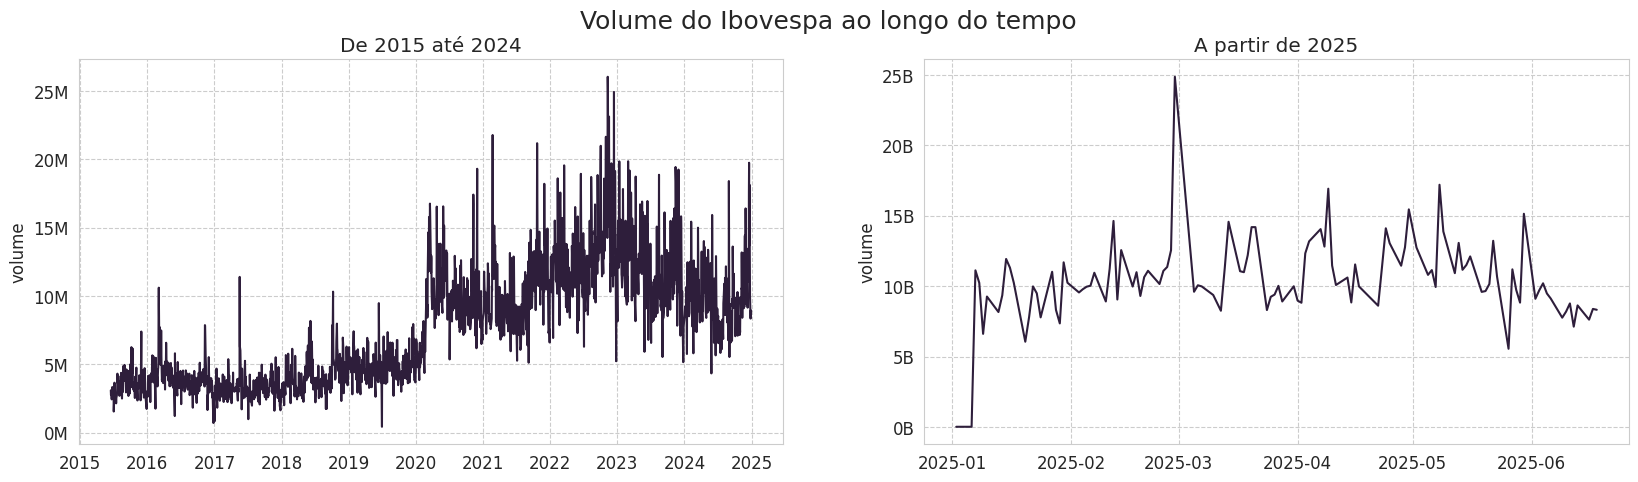

In [13]:
fig, ax = plt.subplots(1, 2, figsize=(20,5))

df_2015_2024 = df.loc[df.index.year < 2025]
df_2025 = df.loc[df.index.year >= 2025]

plt.suptitle('Volume do Ibovespa ao longo do tempo', size=18)

sns.lineplot(data=df_2015_2024, x=df_2015_2024.index, y='volume', ax=ax[0])
ax[0].set_title('De 2015 até 2024')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_locator(mdates.YearLocator(base=1))
ax[0].yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x/1e6:,.0f}M'))

sns.lineplot(data=df_2025, x=df_2025.index, y='volume', ax=ax[1])
ax[1].set_title('A partir de 2025')
ax[1].set_xlabel('')
ax[1].yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x/1e9:,.0f}B'))

plt.show()

Existe uma mudança abrupta na escala do volume a partir de 7 de janeiro de 2025. Pode ser erro na base de dados.
(professores falaram que os dados estão corretos)

Melhor não usar o volume ou as features baseadas no volume devido a essa mudança de escala, pois afetaria negativamente o treinamento do modelo.

### Análise multivariada

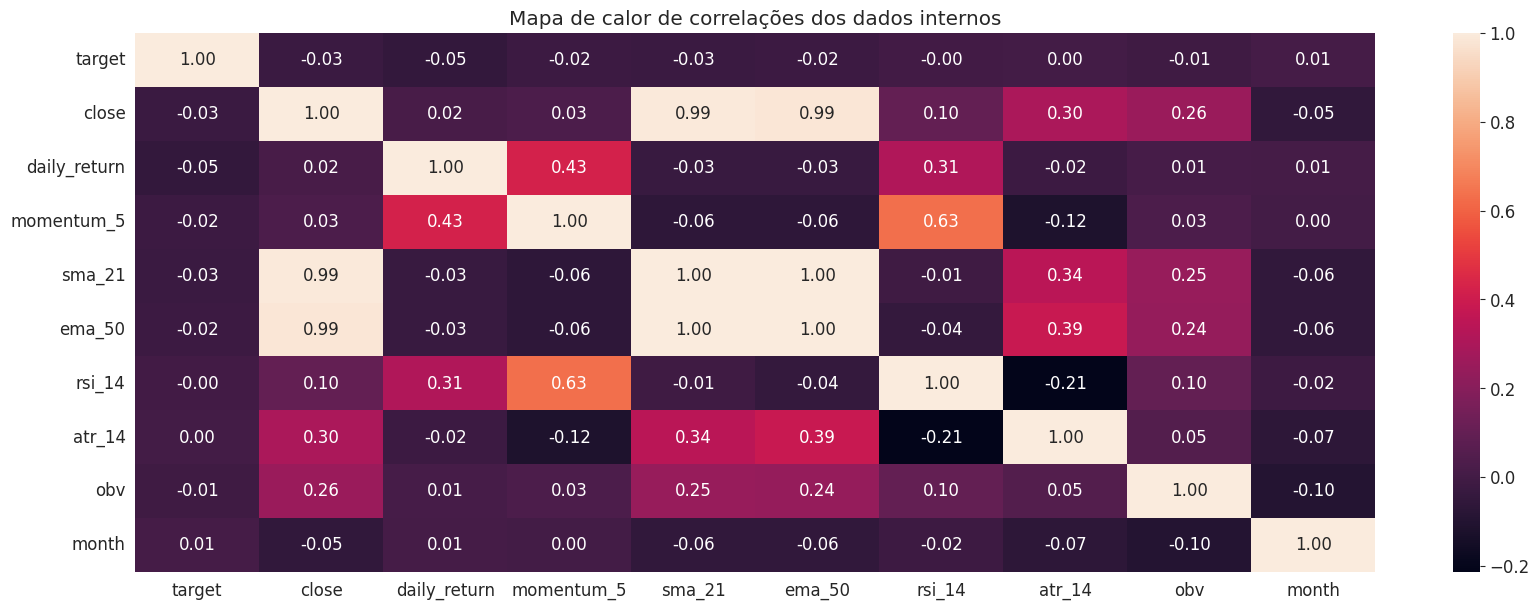

In [14]:
# mapa de calor de correlação das variáveis
columns_corr = ['target', 'close', 'daily_return', 'momentum_5', 'sma_21', 'ema_50', 'rsi_14', 'atr_14', 'obv', 'month']
corr = df[columns_corr].corr(numeric_only=True)

sns.heatmap(corr, annot=True, fmt='.2f')
plt.title('Mapa de calor de correlações dos dados internos')
plt.show()

As colunas de fechamento, SMA e EMA têm uma correlação muito alta. Para evitar multicolinariedade no modelo, vamos usar apenas uma dessas features no treinamento.

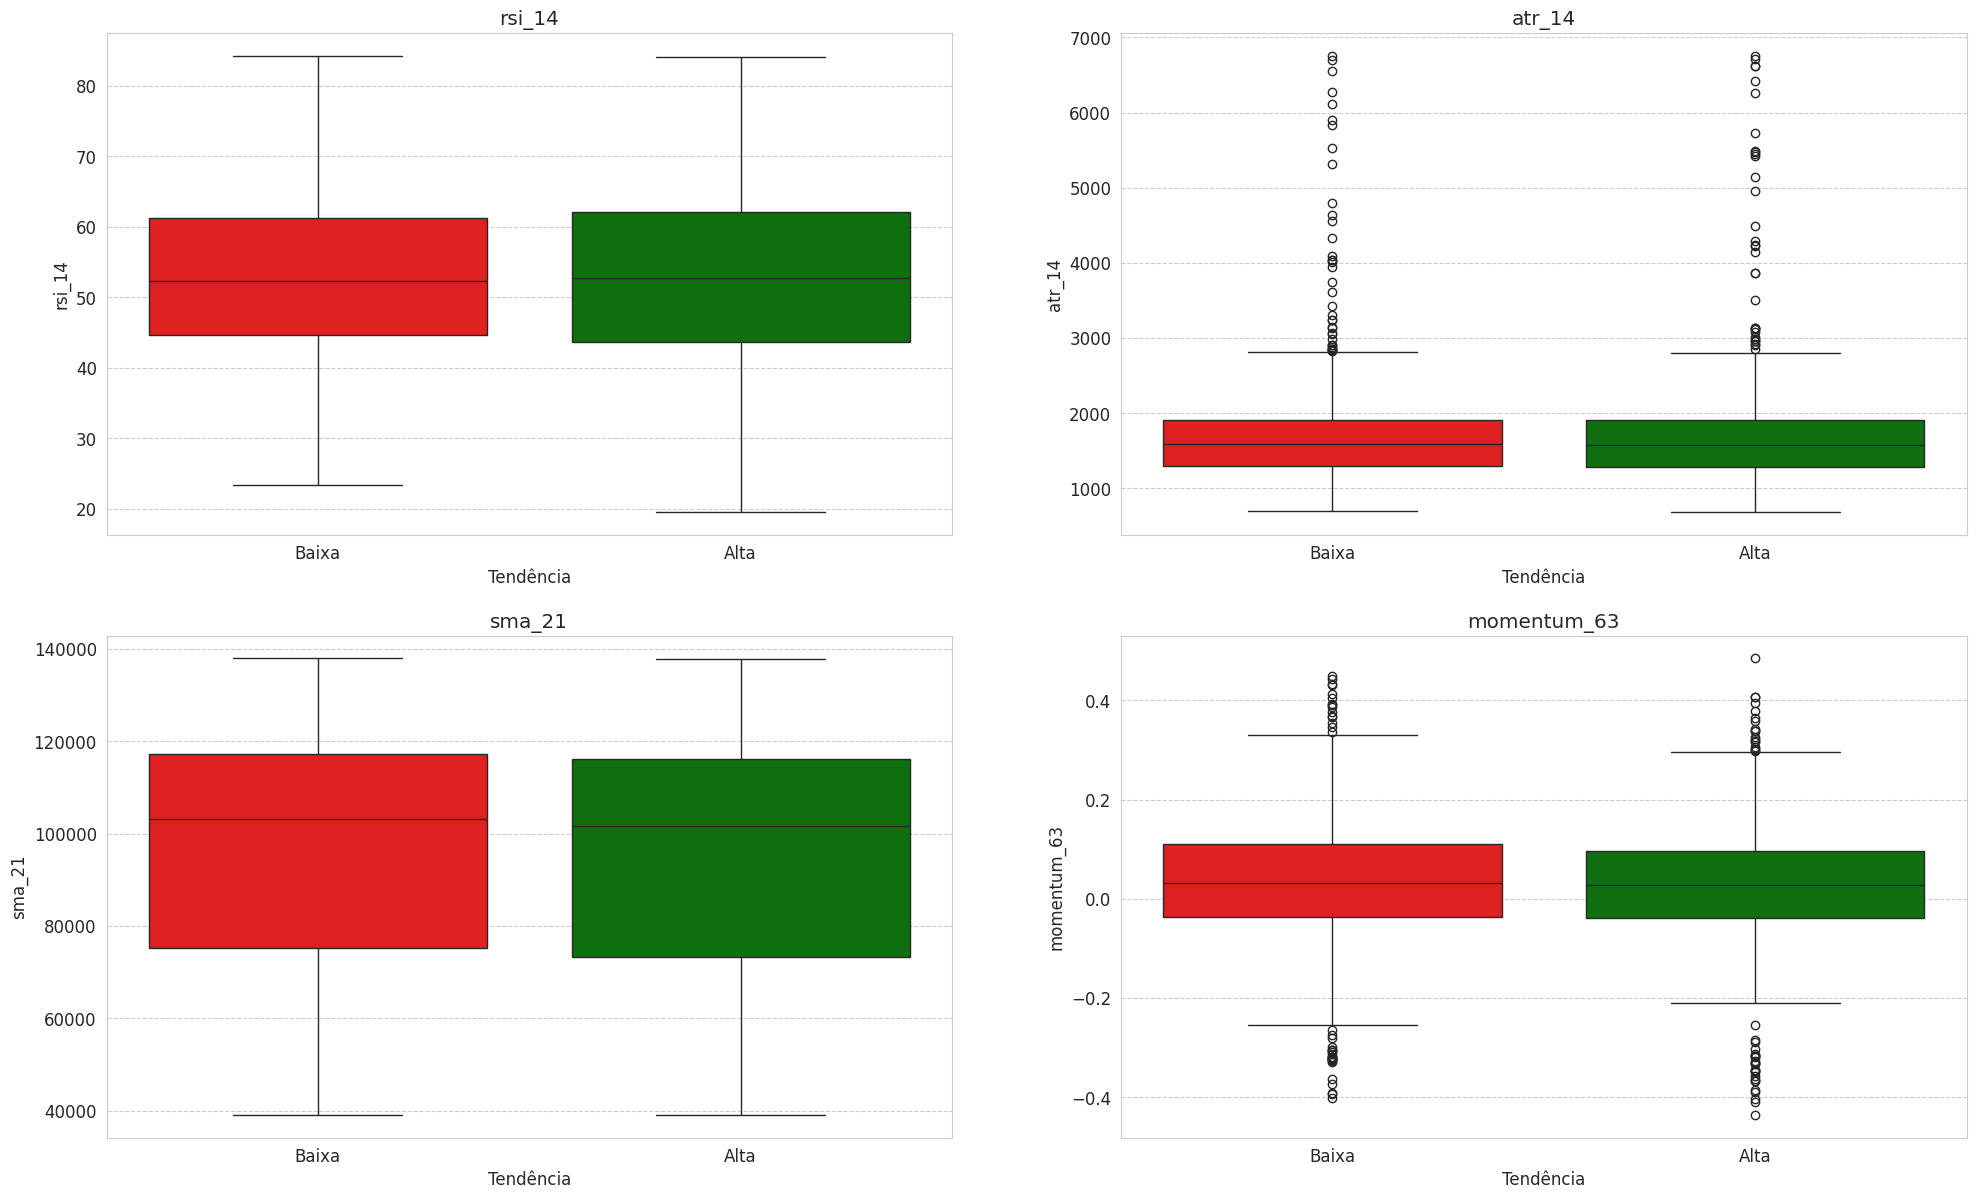

In [15]:
colunas = df[['rsi_14', 'atr_14', 'sma_21', 'momentum_63']]

plt.figure(figsize=(24,30))

for i, coluna in enumerate(colunas, 1):
    plt.subplot(4, 2, i)
    sns.boxplot(data=df, x='target', y=coluna, hue='target', palette=palette_green_red, legend=False)
    plt.title(coluna)
    plt.xlabel('Tendência')
    plt.ylabel(coluna)
    plt.xticks(ticks=[0, 1], labels=['Baixa', 'Alta'])

Isoladamente, nenhuma dessas features é um forte preditor da tendência, pois os valores não variam entre a classe 0 ou 1.

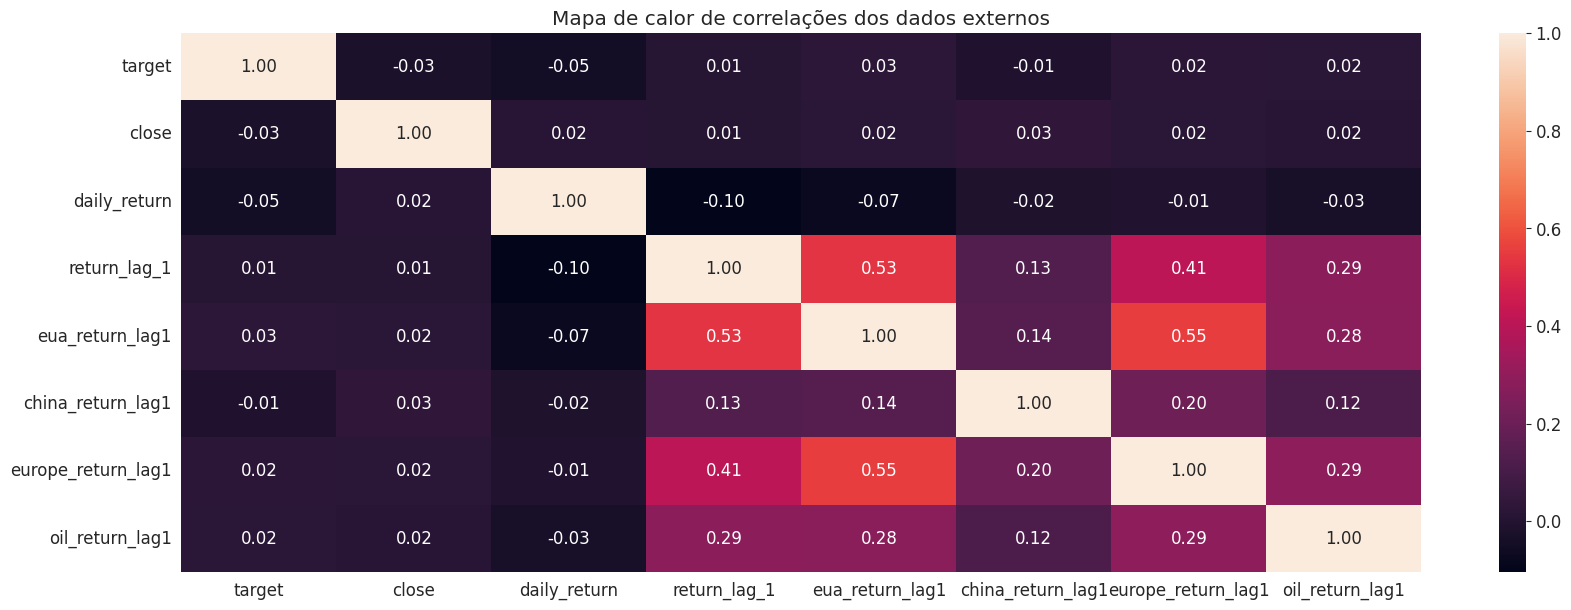

In [21]:
# mapa de calor de correlação das variáveis baseadas em fontes externas
columns_corr = ['target', 'close', 'daily_return', 'return_lag_1', 'eua_return_lag1', 'china_return_lag1', 'europe_return_lag1', 'oil_return_lag1']
corr = df[columns_corr].corr(numeric_only=True)

sns.heatmap(corr, annot=True, fmt='.2f')
plt.title('Mapa de calor de correlações dos dados externos')
plt.show()

## Testes de hipótese

O teste de Shapiro-Wilk é um teste de hipótese que verifica se uma amostra de dados segue uma distribuição normal.

* Hipótese Nula (H₀): A amostra provém de uma população com distribuição normal.
* Hipótese Alternativa (H₁): A amostra NÃO provém de uma população com distribuição normal.

In [17]:
# Teste de hipótese da distribuição do retorno diário
stat, p = stats.shapiro(df['daily_return'])
print(f'Estatística do teste: {stat:.4f}\nValor-p: {p}')

# Nível de significância de 95%
alpha = 0.05
if p > alpha:
    print("\nConclusão: Não há evidência suficiente para rejeitar a hipótese nula. Os dados seguem uma distribuição normal.")
else:
    print("\nConclusão: Rejeitamos a hipótese nula. Os dados NÃO seguem uma distribuição normal.")

Estatística do teste: 0.9032
Valor-p: 4.8425205682773785e-37

Conclusão: Rejeitamos a hipótese nula. Os dados NÃO seguem uma distribuição normal.


Validamos estatisticamente que os retornos do mercado financeiro possuem "caudas gordas" (mais eventos extremos do que o normal). Isso é crucial para entender o risco e a volatilidade do mercado. Modelos como Random Forest e XGBoost é a mais adequada para capturar os padrões complexos e não-lineares presentes no mercado.

---
O teste ADF (Augmented Dickey-Fuller) verifica se a série é estacionaria, ou seja, como as propriedades mudam ao longo do tempo.

* Hipótese Nula (H₀): A série NÃO é estacionária (ela possui uma raiz unitária).
* Hipótese Alternativa (H₁): A série É estacionária (ela não possui uma raiz unitária).

In [18]:
serie = df['daily_return'].values
result = adfuller(serie)

# Extrai e interpreta os resultados
print("Teste ADF")
print(f"Teste Estatístico: {result[0]}")
print(f"P-Value: {result[1]}")
print("Valores críticos:")

for key, value in result[4].items():
  print(f"\t{key}: {value}")

# Nível de significância de 95%
if result[1] <= 0.05:
    print("\nConclusão: Rejeitamos a hipótese nula. A série é estacionária.")
else:
    print("\nConclusão: Não rejeitamos a hipótese nula. A série NÃO é estacionária.")

Teste ADF
Teste Estatístico: -18.100030090418546
P-Value: 2.5552291335849795e-30
Valores críticos:
	1%: -3.4329948869452735
	5%: -2.8627084918155745
	10%: -2.5673920343230283

Conclusão: Rejeitamos a hipótese nula. A série é estacionária.


In [19]:
serie = df['close'].values
result = adfuller(serie)

# Extrai e interpreta os resultados
print("Teste ADF")
print(f"Teste Estatístico: {result[0]}")
print(f"P-Value: {result[1]}")
print("Valores críticos:")

for key, value in result[4].items():
  print(f"\t{key}: {value}")

# Nível de significância de 95%
if result[1] <= 0.05:
    print("\nConclusão: Rejeitamos a hipótese nula. A série é estacionária.")
else:
    print("\nConclusão: Não rejeitamos a hipótese nula. A série NÃO é estacionária.")

Teste ADF
Teste Estatístico: -1.3173992773502212
P-Value: 0.6211750088335084
Valores críticos:
	1%: -3.432997028182592
	5%: -2.862709437378743
	10%: -2.5673925377546976

Conclusão: Não rejeitamos a hipótese nula. A série NÃO é estacionária.


Modelos de Machine Learning funcionam melhor e generalizam de forma mais robusta quando alimentados com features estacionárias, porque as relações que eles aprendem entre essas features e o alvo têm mais chance de se manterem válidas no futuro. Por isso, o retorno diário é uma feature melhor que os preços de fechamento, abertura, mínima e máxima (que não são estacionários).